<module 'matplotlib.pyplot' from 'c:\\Users\\tommy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

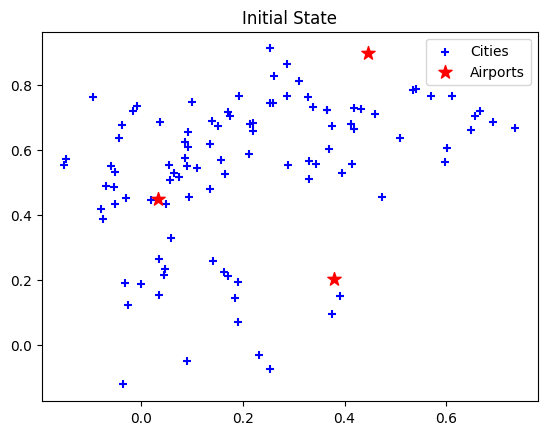

In [19]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt


plt.title("Initial State")
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\tommy\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

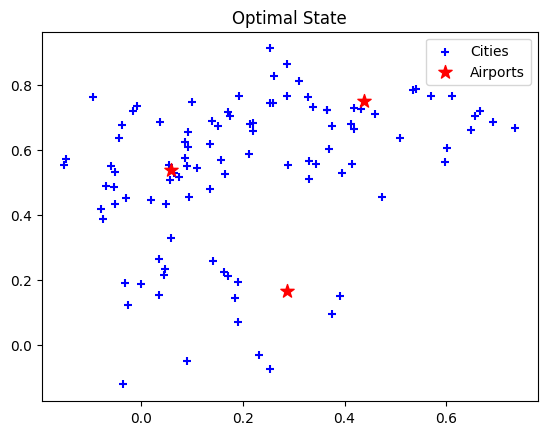

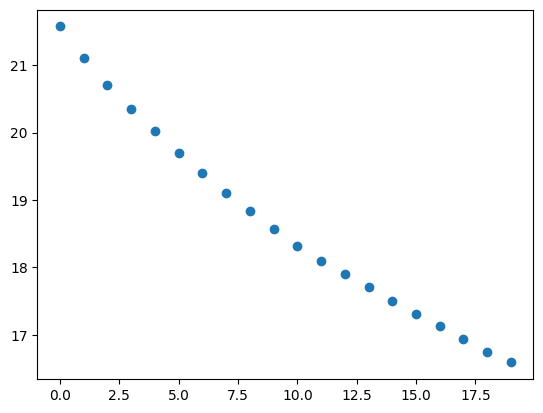

In [20]:
def objectiveCalculation(airport, city):
    return math.sqrt((airport[0] - city[0])**2 + (airport[1] - city[1]) ** 2)

objectiveValuesList = []

# Loop 20 times to get a near-optimized location point
for i in range(20):
    # Gradient Based Optimization Algorithm
    alpha = 0.001

    # Dictionary to store all cities closest to that airport coordinate
    airplaneDict = {airports[0]: [], airports[1]: [], airports[2]: []}

    # Move city to its nearest airports
    for city in cities:
        # Compute distances of each city to each airport with distance formula
        airport1Distance = objectiveCalculation(airports[0], city)
        airport2Distance = objectiveCalculation(airports[1], city)
        airport3Distance = objectiveCalculation(airports[2], city)
        
        distances = [airport1Distance, airport2Distance, airport3Distance]
        distances.sort()

        # The minimum distance determines which airport it is close to
        if min(distances) == airport1Distance:
            airplaneDict[airports[0]].append(city)

        elif min(distances) == airport2Distance:
            airplaneDict[airports[1]].append(city)
        
        elif min(distances) == airport3Distance:
            airplaneDict[airports[2]].append(city)
        
    totalX = 0
    totalY = 0
    count = 0

    # Compute direction for airport move towards
    for airport in airplaneDict:
        for coordinate in airplaneDict[airport]:
            totalX += 2 * (airport[0] - coordinate[0])
            totalY += 2 * (airport[1] - coordinate[1])

        # Move airport towards new X,Y coordinate
        airports[count] = (airports[count][0] - (alpha * totalX), airports[count][1] - (alpha * totalY))

        count += 1
        totalX = 0
        totalY = 0

    # Append objective function values after updating location
    total = 0
    for airport in airplaneDict:
        for coordinate in airplaneDict[airport]:
            total += objectiveCalculation(airport, coordinate)
    
    objectiveValuesList.append(total)

# Plot on graph
plt.figure(2)
plt.title("Optimal State")
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt


plt.figure(3)
plt.scatter(range(20), objectiveValuesList)
plt